<img align="left" style="width: 170px;" src="udea_escudo.png">

# Laboratorio 2 PDS 2020-1
### Yorguin José Mantilla Ramos
CC.1127617499
 
Grupo:3


### 2. Muestreo
#### 2.1. Cargue la señal correspondiente al ultimo número de su cedula. Con base en el número total de muestras y a la frecuencia de muestreo, grafique la señal en función del tiempo.

samplerate: 48000
shape: (167040,)


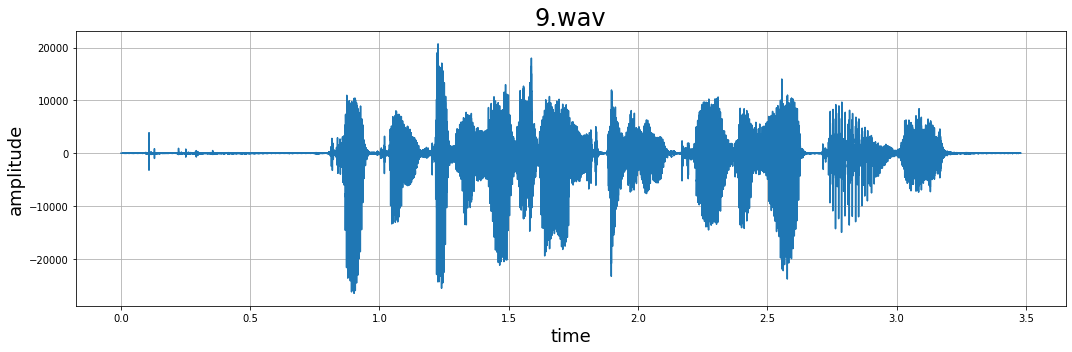

In [1]:
from scipy.io import wavfile
from IPython.display import Audio
from IPython.display import display
import libraries.my_utils as mu
import numpy as np

my_file = '9.wav'

samplerate, data = wavfile.read(my_file)
print('samplerate:',samplerate)
print('shape:',data.shape)

time = np.arange(0,data.shape[0]/samplerate,1/samplerate)

mu.plot_signal(time,data,xlabel='time',ylabel='amplitude',title = my_file,format=None,size=(15,5),show=True,ret=False)
display(Audio(data,rate=samplerate))

#### 2.2 Genere un nuevo archivo de audio con la misma señal pero al doble y luego con la mitad de la frecuencia de muestreo original. Escuche el audio, ¿Que diferencia nota? ¿A que se debe esto?. Tip: Para generar el archivo utilice las siguientes lineas:

In [2]:
from scipy.io.wavfile import write
double_name = 'file_x2.wav'
half_name = 'file_x0.5.wav'
write (double_name, int(2*samplerate) , data)
write (half_name, int(0.5*samplerate) , data)

fs_x2, data_x2 = wavfile.read(double_name)
fs_d2, data_d2 = wavfile.read(half_name)

display(Audio(data_x2,rate=fs_x2))
display(Audio(data_d2,rate=fs_d2))

Conclusiones:

- Al generar el audio con el doble de la frecuencia de muestreo se escucha el doble de rápido y dura la mitad del tiempo.
- Al generar el audio con la mitad de la frecuencia de muestreo se escucha la mitad de rápido y dura el doble del tiempo.

Esto ocurre ya que la cantidad de datos es constante pero su interpretación en el tiempo cambia al variar la frecuencia de muestreo.

Con $2fs$ ocurre que la cantidad de datos se divide entre $2fs$ para obtener la duración en el tiempo, y eso da la mitad de lo que debería durar normalmente. En otras palabras lo que antes ocupaba 1 segundo ahora ocupa 0.5 segundos.

Con $0.5fs$ ocurre que la cantidad de datos se divide entre $0.5fs$ para obtener la duración en el tiempo, y eso da el doble de lo que debería durar normalmente. En otras palabras lo que antes ocupaba 1 segundo ahora ocupa 2 segundos.

En general:

$$duracion = \frac{cantidad\;de\;datos}{k\cdot fs}$$

Este efecto de contracción y dilatación temporal tambien afecta el contenido frecuencial percivido (y en efecto interpretado mediante la frecuencia de muestreo). De esa manera uno se escucha más agudo y otro más grave en comparación al audio original.

#### 2.3. Sub-muestree la señal usando un cuarto de la frecuencia de muestreo original. Reproduzca la señal resultante y la original, ambas usando una frecuencia de fs/6. Grafique ambas señales en la misma figura. ¿Que puede concluir?

(27840,)
(167040,)


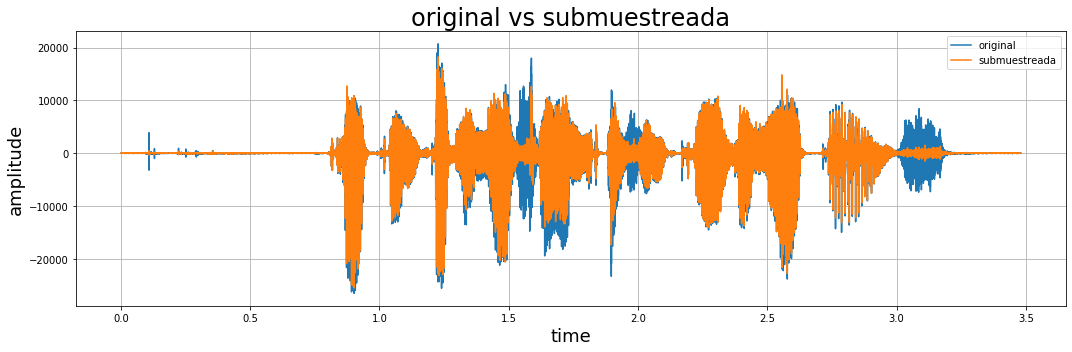

In [3]:
from scipy.signal import resample
import numpy as np
import matplotlib.pyplot as plt

k = 1/6
new_fs = samplerate*k
new_len = data.shape[0]*k

time = np.arange(0,data.shape[0]/samplerate,1/samplerate)
new_time = np.arange(0,data.shape[0]/samplerate,1/new_fs)

data_subsampled = resample(data , int(new_len))

print(data_subsampled.shape)
print(data.shape)

fig,ax= mu.plot_signal(time,data,xlabel='time',title='original vs submuestreada',ylabel='amplitude',ret=True,show=False)
ax.plot(new_time,data_subsampled)
ax.legend(['original','submuestreada'])
plt.show()

hear = [Audio(data,rate=samplerate),
Audio(data_subsampled,rate=new_fs),
Audio(data,rate=new_fs)]

_ = [display(x) for x in hear]

Conclusiones:

- Disminuir la frecuencia de muestreo disminuyó la calidad de la señal.
- Lo anterior se puede ver graficamente por la pérdida de datos (se perdieron 5/6 de los datos y se mantuvo 1/6).
- Y a su vez se nota al escucharlo (ambas reproducidas con sus frecuencias de muestreo correspondientes), las frecuencias altas se perdieron.
- Si en cambio se reproduce la original pero con la nueva frecuencia de muestreo (fs/6) vamos a escuchar una versión dilatada de esta. En efecto esto es lo que estabamos haciendo en el punto 2.2
- En particular las zonas mas afectadas son aquellas donde la señal varia muy rapidamente, por lo que el submuestreo no es capaz de captar esos cambios. Es por esto que se pierden las frecuencias altas.

### 3. Frecuencia de Nyquist y Aliasing
#### 3.1. Genere una señal sinusoidal con una frecuencia de 1Hz y una frecuencia de muestreo de 20Hz. Genere otra señal sinusoidal de frecuencia 1Hz y muestreela según el teorema de Nyquist. Grafique señales en la misma figura. ¿Es posible recuperar la señal a partir de esta reconstrucción?

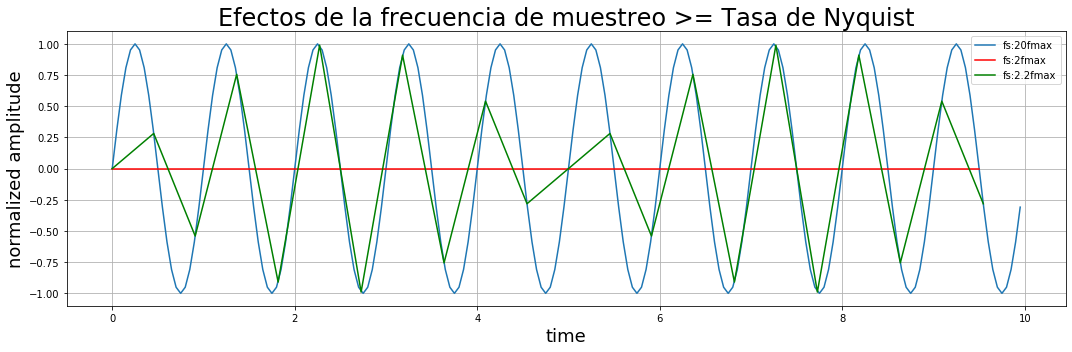

In [4]:

freq_sine = 1
time20 = np.arange(0,10,1/20)
timeN = np.arange(0,10,1/(freq_sine*2))
timeN2 = np.arange(0,10,1/(freq_sine*2.2))
timeN4 = np.arange(0,10,1/(freq_sine*5))
s20 = mu.get_harmonic_signal(1,time=time20)
sN = mu.get_harmonic_signal(1,time=timeN)
sN2 = mu.get_harmonic_signal(1,time=timeN2)

fig,ax= mu.plot_signal(time20,s20,xlabel='time',title='Efectos de la frecuencia de muestreo >= Tasa de Nyquist',ylabel='normalized amplitude',ret=True,show=False,format='-')
ax.plot(timeN,sN,'r-')
ax.plot(timeN2,sN2,'g-')

ax.legend(['fs:20fmax','fs:2fmax','fs:2.2fmax'])
plt.show()



Conclusiones:

- Con exactamente fs = 2fmax (mínimo de Nyquist) no podemos recuperar la señal.
- Con fs = 2.2fmax (ligeramente por arriba de Nyquist) ocurre una especie de modulación, se puede recuperar la frecuencia pero no la amplitud transiente.
- Con fs = 20fmax (muy por arriba de Nyquist) se puede recuperar muy bien la señal.

De hecho si se prueba con $fs = 4f_{max}$ ya se puede empezar a recuperar bien la amplitud

#### 3.2 Escriba un código que genere dos señales sinusoidales con frecuencias f1 = 1Hz y f2 = (11 + n)Hz (n es el ultimo d´ıgito de su cedula), respectivamente, ambas muestreadas a fs=14Hz y que las grafique en la misma figura. ¿Ambas señales quedan bien representadas. ¿ A que se debe esto?

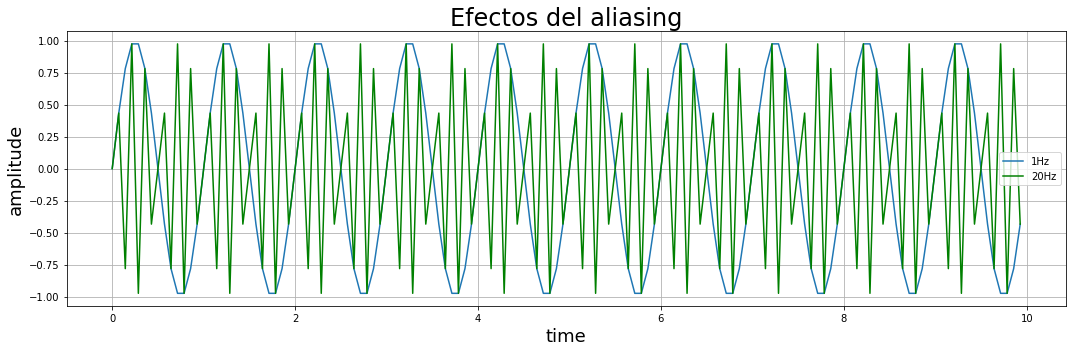

aliasing: 6.0


In [5]:
n = 9
fs = 14
time = np.arange(0,10,1/fs)

s1 = mu.get_harmonic_signal(1,time=time)
s2 = mu.get_harmonic_signal((11+n),time=time)

fig,ax= mu.plot_signal(time,s1,xlabel='time',title='Efectos del aliasing',ylabel='amplitude',ret=True,show=False,format='-')
ax.plot(time,s2,'g-')

ax.legend(['1Hz','20Hz'])
plt.show()

def get_perceived_freq(f,fs):
  f_perceived = np.abs(f-fs*np.round(f/fs))
  return f_perceived

print('aliasing:',get_perceived_freq(11+n,fs))


Conclusiones:

- La señal de 1Hz queda bien representada ya que el muestreo esta muy por encima de esa frecuencia.
- La señal de 20Hz (11+9) no queda bien representada y de hecho se ve representada como una señal de 6Hz.
- Esto se debe al aliasing, en esencia ciertos puntos de la señal de 20Hz se capturan pero como no son todos entonces se ve una especie de señal confusora.
- Si se observa la señal verde veremos que de 0s a 2s hay 12 picos (modulados por una envolvente), es decir es una señal de 6Hz. La razón de la modulación en amplitud se debe a lo mostrado en el punto 3.1 .

### 4. Cuantificación

#### 4.1 Use la función mostrada a continuación para Re-cuantizar la señal de audio utilizada en los numerales anteriores a 2, 4 y 12 bits. Escuche y grafique las señales re-cuantificadas. Compare gráficamente las señales re-cuantificadas con la señal original. ¿Que pudo notar?

samplerate: 48000
shape: (167040,)


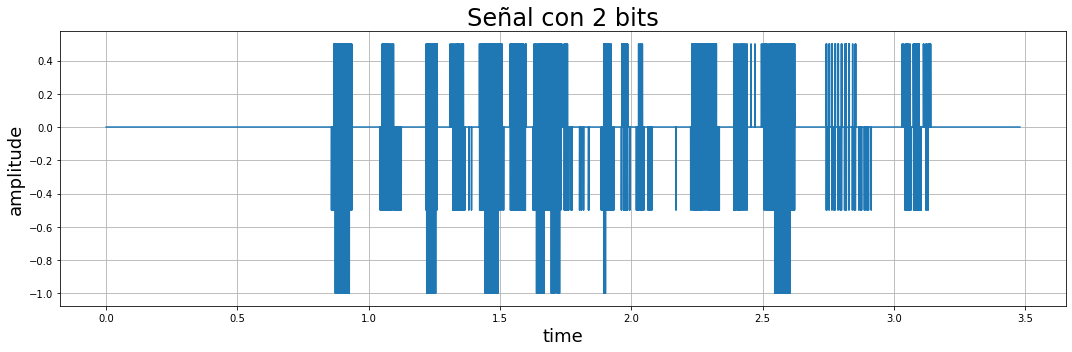

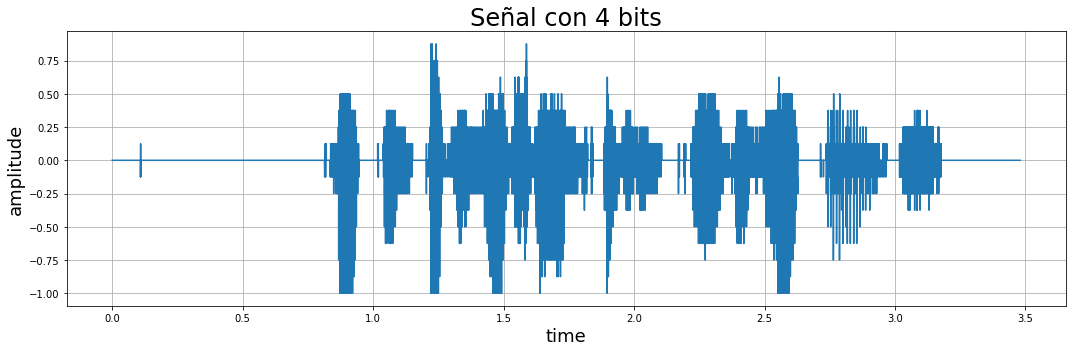

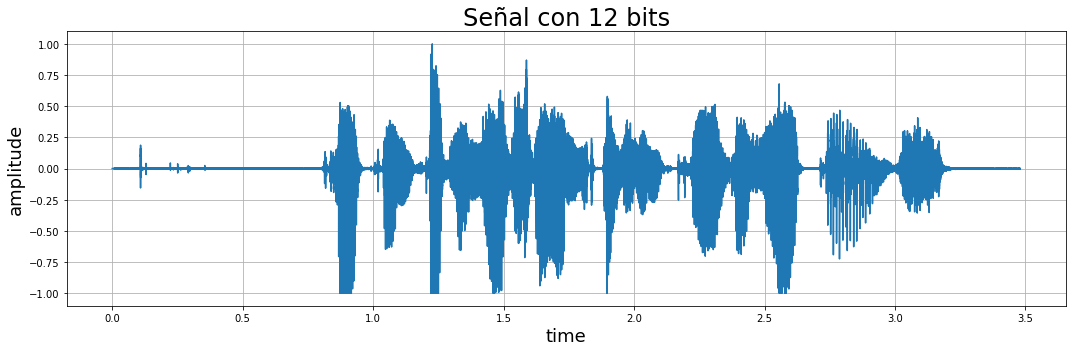

In [6]:
import matplotlib.pyplot as plt
def fxquant(s,bit):
    # s: senal de entrada , debe estar normalizada entre -1 y 1
    # bit: bits de cuantizacion
    Plus1=np.power(2, (bit -1))
    X=s*Plus1
    X=np.round(X)
    X=np.minimum(Plus1 -1.0,X)
    X=np.maximum(-1.0*Plus1 ,X)
    X=X/Plus1
    return X

signals = []
bits = [2,4,12]

samplerate, data = wavfile.read('9.wav')
print('samplerate:',samplerate)
print('shape:',data.shape)

data = data/np.max(data) #Normalizacion
time = np.arange(0,data.shape[0]/samplerate,1/samplerate)


for bit in bits:
    signals.append(fxquant(data,bit))


for i,sig in enumerate(signals):
    fig,ax = mu.plot_signal(time,sig,xlabel='time',title='Señal con {} bits'.format(bits[i]),ylabel='amplitude',format='-',ret=True,show=False)
    plt.show()

hear = [display(Audio(x,rate=samplerate)) for x in signals]


Conclusiones

- Al cuantificar con muy pocos bits la señal se distorsiona notablemente
- Al incrementar en número de bits la distorsión se disminuye y esto se puede asociar con el error de cuantificación.
- Con 12 bits ya la señal se escucha bien

Recordemos que el ruido generado por error de cuantificación tiene una potencia de:

$$\sigma_e^{2} = \frac{\Delta^2}{12} $$

Además sabemos que:

$$\Delta = \frac{Rango\;Dinamico}{2^B-1}$$

De estas dos expresiones se pueden derivar las conclusiones anteriores. Al aumentar el número de bits disminuye $\Delta^2$.

### 5.1. Generación de señales analógica y digital

#### 5.1.1 Cargue la señal de audio correspondiente al ultimo número de su cédula.



In [7]:
samplerate, data = wavfile.read('9.wav')
time = np.arange(0,data.shape[0]/samplerate,1/samplerate)

print('samplerate:',samplerate)
print('shape:',data.shape)



samplerate: 48000
shape: (167040,)


#### 5.1.2 Para obtener la señal analógica,normalice el audio en amplitud y luego re-escale en un factor de 400. Use el siguiente código ayuda. norm es la señal normalizada y sA es la señal analógica resultante.

In [8]:
norm = 1.0 / np.max(np.abs(data))
sA = 400.0 * data * norm



#### 5.1.3 La señal digital se obtiene aproximando cada punto de la señal analógica a un valor discreto que generalmente es un entero. Use la función round() de la libreria numpy para aproximar la señal analógica y obtener la señal digital.

In [9]:
sD = np.round(sA)

#### 5.1.4 Para ver las diferencias entre la se˜ nal analógica y digital grafique, en una misma figura, peque˜ nos segmentos de estas. ¿Se puede escuchar esa diferencia entre los audios?

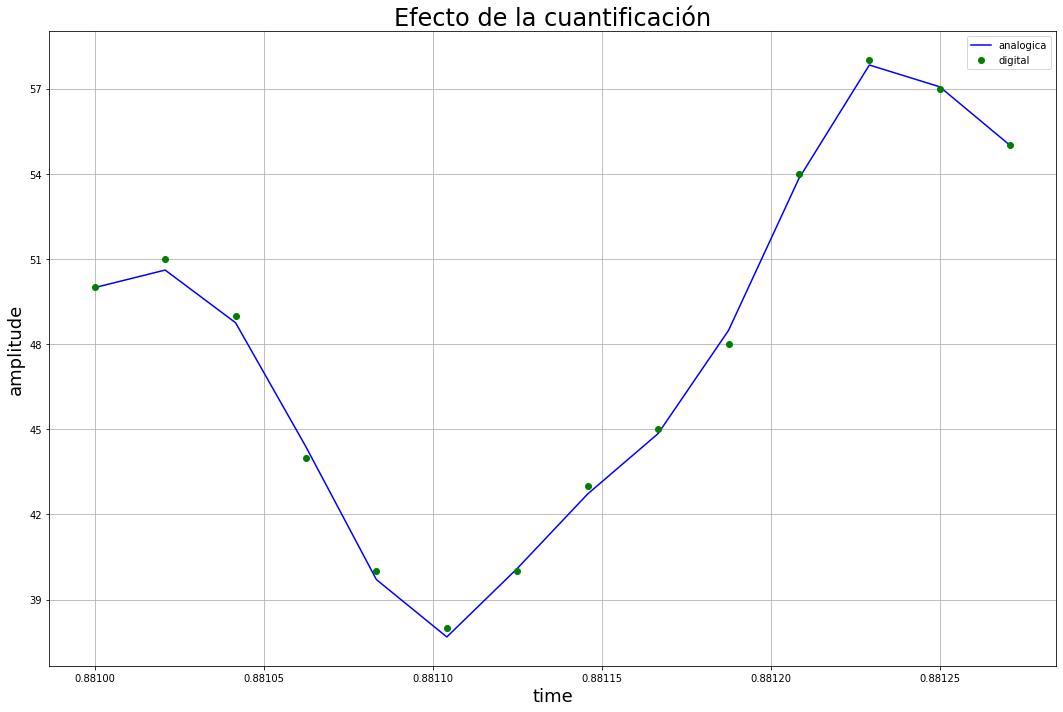

[50. 51. 49. 44. 40. 38. 40. 43. 45. 48. 54. 58. 57. 55.]
dynamic_range: 712.0899011991855


In [10]:
start = mu.s2f(0.8810,samplerate) # Esto es para pasar de segundos a muestras
stop = mu.s2f(0.8813,samplerate)

from matplotlib.ticker import MaxNLocator

fig,ax= mu.plot_signal(time[start:stop],sA[start:stop],xlabel='time',ylabel='amplitude',title='Efecto de la cuantificación',ret=True,show=False,format='b-',size=(15,10))
ax.plot(time[start:stop],sD[start:stop],'go')

ax.yaxis.set_major_locator(MaxNLocator(integer=True))

ax.legend(['analogica','digital'])
plt.show()
print(sD[start:stop])

dynamic_range = np.max(sA)-np.min(sA)
print('dynamic_range:',dynamic_range)

_ = [display(x) for x in [Audio(sA,rate=samplerate),Audio(sD,rate=samplerate)]]

Conclusiones:

Realmente la diferencia tanto gráfica como auditivamente es muy poca. Esto es porque el rango dinámico de la señal es muy alto (712) por lo que una diferencia de amplitud en el orden de las decimas (aproximar al entero cercano) no afecta realmente.

Si el rango dinámico de la señal fuera más bajo (por ejemplo de -1 a 1) entonces si afectaría mucho más ya que tan solo hay 3 enteros en ese intervalo por lo que necesitariamos necesariamente de decimales.

### 5.2. Transmision

#### 5.2.1 Use la función llamada repeater(...) que recibe como entrada la señal a transmitir, la amplitud del ruido que se desea agregar, y la constante de atenuación, y retorna la señal afectada por el ruido, atenuada, y amplificada nuevamente.

In [11]:
def repeater(x, noise_amplitude , attenuation):
    x=x*attenuation
    Noise=np.random.uniform(-noise_amplitude , noise_amplitude , len(x))
    x=x+Noise
    x=x/attenuation
    return x    

#### 5.2.2 La transmisión análoga no es más que una secuencia de repetidores, la cual puede ser implementada con la siguiente función.

In [12]:
def analog_tx(x, num_repeaters , noise_amplitude , attenuation):
    for n in range(0, num_repeaters):
        x = repeater(x, noise_amplitude , attenuation)
    return x

#### 5.2.3. Para la señal digital, sin embargo se puede volver a cuantificar la señal despues de cada repetidor, ya que sabemos que sólo tiene valores enteros. para esto se tiene la siguiente función.

In [13]:
def digital_tx(x, num_repeaters , noise_amplitude , attenuation):
    for n in range(0, num_repeaters):
        x = np.round(repeater(x, noise_amplitude , attenuation))
    return x


def digital_repeater(x, noise_amplitude , attenuation):
    x=x*attenuation
    Noise=np.random.uniform(-noise_amplitude , noise_amplitude , len(x))
    x=x+Noise
    x = np.round(x) # se debería digitalizar antes de amplificar
    x=x/attenuation
    return x

def digital_tx2(x, num_repeaters , noise_amplitude , attenuation):
    for n in range(0, num_repeaters):
        x = np.round(digital_repeater(x, noise_amplitude , attenuation))
    return x

Nota:

Agregué las funciones:
- digital_repeater
- digital_tx2

Esto debido a que a mi juicio el repetidor digital debe digitalizar la señal (x+Noise) antes de amplificar (dividir por la atenuación). Es mediante ese mecanismo que el repetidor digital logra ser menos sensible al ruido, ya que este se corta antes de amplificarlo.

En la funcion original digital_tx simplemente se redondea una señal donde el ruido ya fue amplificado (por la función repeater), entonces la ventaja de digitalizar realmente no se materializa. Esto se podrá ver los proximos puntos donde al utilizar la función original no se tienen SNRs significativamente mejores que los dados por la transmision análogica.

#### 5.2.4 Compare los esquemas de transmisión de las señales. Para ello defina el número de repetidores en 170, la amplitud del ruido 0.3, y la constante de atenuación en 0.5. Luego realice la transmisión de las señal análoga y digital en cada uno de sus respectivos esquemas de transmisión, y calcule la relación señal a ruido (SNR) tanto para la señal análoga como digital. Escuche ambas señales luego de la transmisión.

In [14]:
def SNR(noisy , original):
    # power of the error
    err = np.var(original -noisy)
    # power of the signal
    sig = np.var(original)
    # SNR in dBs
    if err==0:
        return np.inf
    return 10 * np.log10(sig/err)

samplerate, data = wavfile.read('9.wav')
norm = 1.0 / np.max(np.abs(data))
sA = 400.0 * data * norm
sD = np.round(sA)

num_repeaters = 170
noise_amp = 0.3
att = 0.5
sA_r = analog_tx(sA,num_repeaters,noise_amp,att)
sD_r = digital_tx(sD,num_repeaters,noise_amp,att)
sD_r2 = digital_tx2(sD,num_repeaters,noise_amp,att)
print('sA_SNR:',SNR(sA_r,sA))
print('sD_SNR:',SNR(sD_r,sD))
print('sD2_SNR:',SNR(sD_r2,sD))

_ = [display(Audio(x,rate=samplerate)) for x in [sA_r,sD_r,sD_r2]]

sA_SNR: 18.576079849587266
sD_SNR: 17.160805896723282
sD2_SNR: 35.717416298694175


Conclusiones

Teniendo en cuenta la Nota del punto 5.2.3 vemos que el SNR transmitido analogicamente (analog_tx) y digitalmente por el método original (digital_tx) no son significativamente diferentes.

Sin embargo al implementar un repetidor digital que digitalice ANTES de amplificar (digital_repeater y digital_tx2) si se logra ver la ventaja de la transmisión digital. Sin embargo es importante tener en cuenta que la cuantificación utilizada debe ser adecuada ya que si la señal se atenua mucho (por ejemplo quedando en el rango [-1,1] ) entonces al digitalizar en el repetidor se puede distorsionar la señal ya que este esta cuantificando mediante redondeo a los enteros.

Podemos concluir entonces que al menos para (digital_repeater y digital_tx2) el SNR si mejora considerablemente (casi el doble de decibelios).


#### 5.2.5 Manteniendo constantes la amplitud de ruido y la atenuación, realice un barrido del número de repetidores entre 15 y 180 (no lo haga de 1 en 1). Realice nuevamente la transmisión análoga y digital y calcule la SNR para cada una. Al final grafique la SNR en función del número de repetidores.

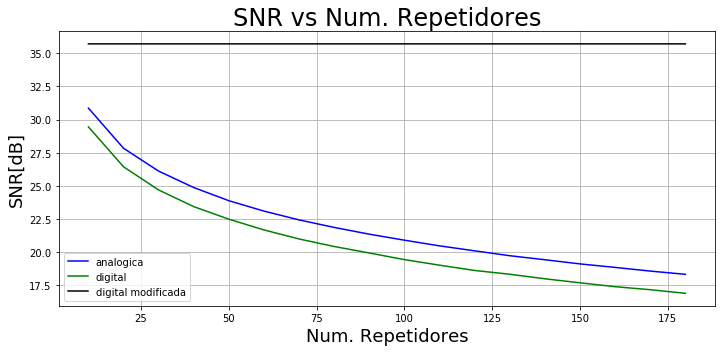

In [15]:
sA_SNRs = []
sD_SNRs = []
sD2_SNRs = []

iters = list(np.arange(10,180+1,10))

for num_repeaters in iters:
    sA_r = analog_tx(sA,num_repeaters,noise_amp,att)
    sD_r = digital_tx(sD,num_repeaters,noise_amp,att)
    sD_r2 = digital_tx2(sD,num_repeaters,noise_amp,att)
    sA_SNRs.append(SNR(sA_r,sA))
    sD_SNRs.append(SNR(sD_r,sD))
    sD2_SNRs.append(SNR(sD_r2,sD))
    
fig,ax= mu.plot_signal(iters,sA_SNRs,xlabel='Num. Repetidores',ylabel='SNR[dB]',title='SNR vs Num. Repetidores',ret=True,show=False,format='b-',size=(10,5))
ax.plot(iters,sD_SNRs,'g-')
ax.plot(iters,sD2_SNRs,'k-')
ax.legend(['analogica','digital','digital modificada'])
plt.show()


Conclusiones

En la gráfica podemos ver lo intuido en la nota del punto 5.2.3:

En las dos transmisiones propuestas originalmente en la guía (análogica y digital) al aumentar el número de repetidores disminuye la calidad de la señal; esto debido que el ruido se amplifica cada vez que pasa por un repetidor.

Es necesario entonces digitalizar ANTES de amplificar para poder disminuir el ruido (lo que se implemento con las funciones modificadas). De esta manera el SNR se mantiene constante a lo largo de los repetidores (siempre y cuando la señal pueda ser bien cuantificada como se dijo en el punto 5.2.3). 

Ahora bien ¿Por qué con las funciones originales (analog_tx,digital_tx) aparentemente la transmisión análogica es siempre mejor?

Esto es debido a que la función digital_tx:
- No logra atenuar el ruido ya que digitaliza luego de que este ruido ya ha sido amplificado
- Y por otra parte introduce ruido de cuantificación.

Es por esto que dicha transmisión se encuentra siempre por debajo de la análogica.